In [1]:
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from data_load import Data
load = Data()
load.HOMES_FOR_SALE()
load.INCOME()
load.HOMICIDES()
load.POPULATION()
load.ZIP_COUNTY()

Loading: C:\Users\ej_la\.cache\kagglehub\datasets\ahmedshahriarsakib\usa-real-estate-dataset\versions\25\realtor-data.zip.csv
200 https://www.huduser.gov/hudapi/public/usps?type=2&query=All


In [4]:
from Final_Data_Output import Final_Data as FD
FD = FD()
Master_df = FD.Merge_all(min_price=1000, max_bed=12, max_bath=10, max_sqft=4000, min_sqft=1)
Master_df['log_price'] = np.log(Master_df['price'])
Master_df = Master_df.loc[Master_df['acre_lot'] < 10, :]
Master_df.info()

c:\Users\ej_la\Documents\Comp_Data_Analysis\House_Prices_Project\Final_Data_Output.py:95: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Homicides'] = df['Homicides'].fillna(0)


<class 'pandas.core.frame.DataFrame'>
Index: 1010505 entries, 0 to 1028430
Data columns (total 55 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   Unnamed: 0_x           1010505 non-null  int64   
 1   brokered_by            1010505 non-null  float64 
 2   status                 1010505 non-null  object  
 3   price                  1010505 non-null  float64 
 4   bed                    1010505 non-null  float64 
 5   bath                   1010505 non-null  float64 
 6   acre_lot               1010505 non-null  float64 
 7   street                 1010505 non-null  float64 
 8   city_x                 1010505 non-null  object  
 9   state_x                1010505 non-null  object  
 10  zip_code               1010505 non-null  float64 
 11  house_size             1010505 non-null  float64 
 12  prev_sold_date         1010505 non-null  object  
 13  Households             1003086 non-null  float64 
 14  Total_A

In [5]:
df = Master_df[['bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'Household_AGI', 'Total_Pop', 'Homicides', 'log_price']]
df = df.dropna()
df = sm.add_constant(df)
df.shape

(1003060, 10)

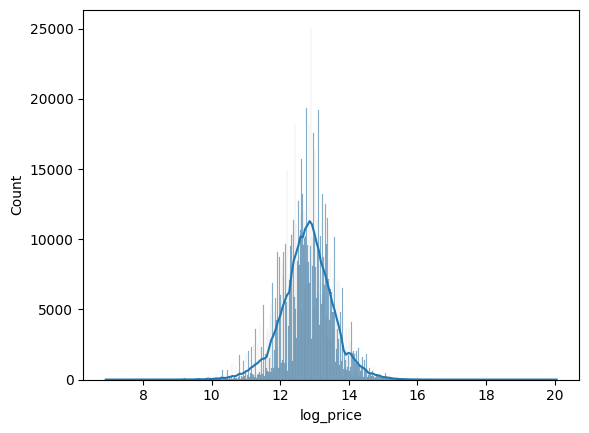

In [6]:
sns.histplot(df['log_price'], kde=True)
plt.show()

In [7]:
df.corr()

,const,bed,bath,house_size,acre_lot,zip_code,Household_AGI,Total_Pop,Homicides,log_price
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bed,NaN,1.000000,0.537485,0.632845,-0.021734,-0.040451,0.030261,0.090371,-0.022924,0.301977
bath,NaN,0.537485,1.000000,0.718202,0.018890,-0.001617,0.212278,0.106416,0.023533,0.501203
house_size,NaN,0.632845,0.718202,1.000000,0.078081,-0.002122,0.195230,0.050200,-0.027956,0.485471
acre_lot,NaN,-0.021734,0.018890,0.078081,1.000000,-0.032769,0.001750,-0.190430,-0.067215,0.035918
zip_code,NaN,-0.040451,-0.001617,-0.002122,-0.032769,1.000000,0.059537,0.208193,0.273572,0.265206
Household_AGI,NaN,0.030261,0.212278,0.195230,0.001750,0.059537,1.000000,-0.055595,0.078578,0.461214
Total_Pop,NaN,0.090371,0.106416,0.050200,-0.190430,0.208193,-0.055595,1.000000,0.235315,0.187414
Homicides,NaN,-0.022924,0.023533,-0.027956,-0.067215,0.273572,0.078578,0.235315,1.000000,0.163573
log_price,NaN,0.301977,0.501203,0.485471,0.035918,0.265206,0.461214,0.187414,0.163573,1.000000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['const','bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'Household_AGI', 
                                                        'Total_Pop', 'Homicides']], df[['log_price']], test_size=0.33, random_state=42)
X_train_fe = X_train[['const','bed', 'bath', 'house_size', 'acre_lot',
                                      'Household_AGI', 'Total_Pop', 'Homicides']]
exog_re = X_train[['const','bed', 'bath', 'house_size', 'acre_lot',
                                   'Household_AGI', 'Total_Pop', 'Homicides']]
exog_re = np.ones((len(X_train), 1))

In [9]:
mod = sm.MixedLM(y_train, X_train_fe, X_train['zip_code'], exog_re=exog_re)
result = mod.fit()
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_price   
No. Observations: 672050  Method:             REML        
No. Groups:       21535   Scale:              0.0864      
Min. group size:  1       Log-Likelihood:     -168282.7428
Max. group size:  701     Converged:          Yes         
Mean group size:  31.2                                    
----------------------------------------------------------
              Coef.  Std.Err.    z     P>|z| [0.025 0.975]
----------------------------------------------------------
const         11.065    0.006 1718.281 0.000 11.053 11.078
bed            0.016    0.001   28.089 0.000  0.014  0.017
bath           0.091    0.001  140.813 0.000  0.089  0.092
house_size     0.000    0.000  386.090 0.000  0.000  0.000
acre_lot       0.041    0.000   99.896 0.000  0.040  0.042
Household_AGI  0.004    0.000   79.960 0.000  0.004  0.004
Total_Pop      0.000    0.000   51.206 0.000  0.000  0.000
Homicide

In [10]:
re = pd.DataFrame(result.random_effects).T.reset_index()
re.columns = ['zip_code', 'random_effect']
temp_df = X_test[['zip_code']].merge(re, on='zip_code', how='left')

In [11]:
exog = X_test[['const', 'bed', 'bath', 'house_size', 'acre_lot',
               'Household_AGI', 'Total_Pop', 'Homicides']]
groups = X_test['zip_code']
y_pred_mixed = result.predict(exog=exog)+ temp_df['random_effect'].values
R_squared = 1 - np.sum((y_test['log_price'] - y_pred_mixed) ** 2) / np.sum((y_test['log_price'] - np.mean(y_test['log_price'])) ** 2)
print(f'Proportion of Variance Explained: {R_squared:.4f}')

Proportion of Variance Explained: 0.8343


In [17]:
perm_df = pd.DataFrame()
zips = list(df['zip_code'].unique())
for z in zips:
    bed = df.loc[df['zip_code'] == z, 'bed'].unique()
    bath = df.loc[df['zip_code'] == z, 'bath'].unique()
    house_size = np.arange(df.loc[df['zip_code'] == z, 'house_size'].min(),
                           df.loc[df['zip_code'] == z, 'house_size'].max()+1, 500)
    acre_lot = np.arange(df.loc[df['zip_code'] == z, 'acre_lot'].min(),
                         df.loc[df['zip_code'] == z, 'acre_lot'].max()+1, 1000)
    Household_AGI = np.arange(df.loc[df['zip_code'] == z, 'Household_AGI'].min(),
                              df.loc[df['zip_code'] == z, 'Household_AGI'].max()+1, 500)
    Total_Pop = np.arange(df.loc[df['zip_code'] == z, 'Total_Pop'].min(),
                          df.loc[df['zip_code'] == z, 'Total_Pop'].max()+1, 1000)
    Homicides = np.arange(df.loc[df['zip_code'] == z, 'Homicides'].min(),
                         df.loc[df['zip_code'] == z, 'Homicides'].max()+1, 1)
    all_permutations = list(itertools.product(bed, bath, house_size, acre_lot,
                                               Household_AGI, Total_Pop, Homicides, [z]))
    temp_df = pd.DataFrame(all_permutations, columns=['bed', 'bath', 'house_size', 'acre_lot',
                                                       'Household_AGI', 'Total_Pop', 'Homicides', 'zip_code'])
    perm_df = pd.concat([perm_df, temp_df], ignore_index=True)
perm_df = perm_df.drop_duplicates().reset_index(drop=True)
perm_df = sm.add_constant(perm_df)
exog = perm_df[['const', 'bed', 'bath', 'house_size', 'acre_lot',
                 'Household_AGI', 'Total_Pop', 'Homicides']]
groups = perm_df['zip_code']
y_pred_perm = result.predict(exog=exog)
perm_df['predicted_log_price'] = y_pred_perm
perm_df['predicted_price'] = np.exp(perm_df['predicted_log_price'])